In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
from sklearn.datasets import make_classification

##### Data

In [48]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [49]:
X

array([[-0.3302184 ,  1.47948876],
       [ 0.44149776, -2.02519257],
       [-1.54151727, -0.11129864],
       ...,
       [ 0.13165064,  1.25110612],
       [-0.08351476,  1.0690647 ],
       [ 0.59882508, -1.69728539]])

In [50]:
data = pd.DataFrame(X, columns=["A","B"])

In [51]:
data.head()

,A,B
0,-0.330218,1.479489
1,0.441498,-2.025193
2,-1.541517,-0.111299
3,1.121472,-1.333928
4,1.555520,-1.188866


<Axes: xlabel='A', ylabel='B'>

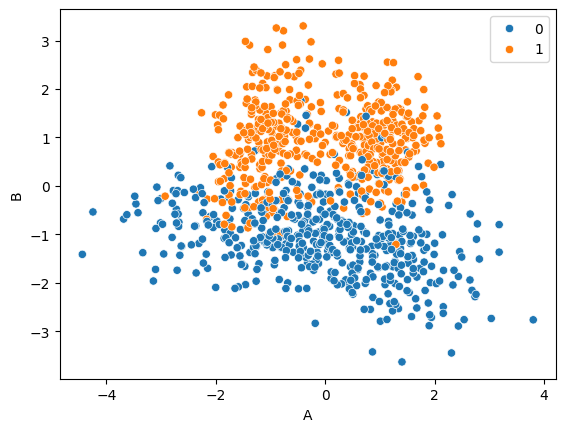

In [52]:
sns.scatterplot(x=data["A"],y=data["B"],hue=y)

##### Training and testing data split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

##### Model

In [55]:
from sklearn.svm import SVC

In [56]:
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [57]:
#weights
svc.coef_

array([[0.00942121, 2.017271  ]])

In [58]:
y_predictions = svc.predict(x_test)

##### Metrics

In [59]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [60]:
print("Classification Report:")
print(classification_report(y_test,y_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       142
           1       0.90      0.86      0.88       158

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



In [61]:
print(f"Confusion Matrix:\n {confusion_matrix(y_test,y_predictions)}")
print(f"Accuracy: {accuracy_score(y_test,y_predictions)}")

Confusion Matrix:
 [[127  15]
 [ 22 136]]
Accuracy: 0.8766666666666667


##### Hyperparameter tuning

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
# defining parameter range
hyperparameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']
              }

In [64]:
svc_GSCV = GridSearchCV(estimator = SVC(), param_grid=hyperparameters, cv=5)

In [65]:
svc_GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [66]:
svc_GSCV.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [67]:
predictions = svc_GSCV.predict(x_test)

In [68]:
print("Classification Report:")
print(classification_report(y_test,predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       142
           1       0.90      0.87      0.89       158

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



In [69]:
print(f"Confusion Matrix:\n {confusion_matrix(y_test,predictions)}")
print(f"Accuracy:\n {accuracy_score(y_test,predictions)}")

Confusion Matrix:
 [[127  15]
 [ 20 138]]
Accuracy:
 0.8833333333333333


##### Visualization

In [70]:
model = SVC(C=0.1, gamma=1, kernel= 'rbf')
model.fit(x_train,y_train)

SVC(C=0.1, gamma=1)

In [71]:
indices = model.support_

In [72]:
support_vectors = model.support_vectors_


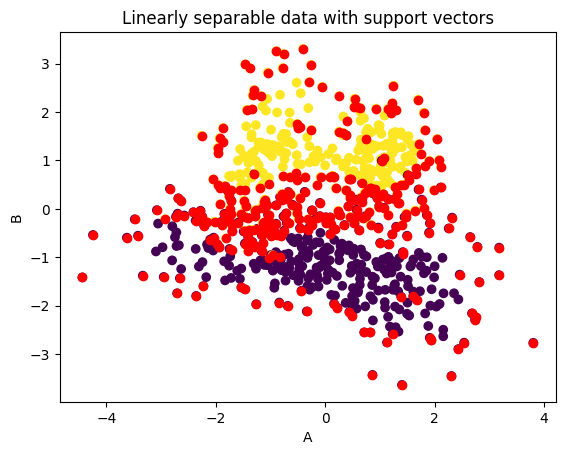

In [73]:
plt.scatter(x_train[:,0], x_train[:,1],c=y_train)
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('A')
plt.ylabel('B')
plt.show()